In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
x_df = pd.read_csv('data_with_avg_intesities_reduced.csv', sep = ',')
values = x_df.values
x_df

,188.195100,188.260100,188.325000,188.390000,188.455000,188.520000,188.585000,188.650000,188.714900,188.779900,...,440.300000,440.353000,440.406100,440.459200,440.512300,440.565300,440.618400,440.671400,440.724500,440.777500
0,582.463687,504.208566,530.709497,467.608939,591.122905,435.320298,543.597765,528.843575,556.465549,527.795158,...,3151.193669,8059.815642,12561.966480,16587.173184,16647.337058,9118.242086,3947.782123,2177.945996,1990.074488,1936.068901
1,577.814035,501.428070,528.219298,464.108772,587.801754,430.540351,539.671930,523.103509,553.461404,524.222807,...,2957.377193,7532.591228,11824.056140,15650.092982,15969.352632,8896.112281,3865.568421,2129.036842,1942.419298,1889.075439
2,581.423759,503.906028,530.794326,464.395390,589.487589,431.744681,540.849291,526.014184,555.927305,526.069149,...,2854.895390,7315.283688,11555.730496,15321.815603,15800.558511,8872.147163,3840.040780,2087.900709,1880.914894,1813.776596
3,578.072897,502.925234,528.289720,464.824299,588.863551,430.351402,538.553271,523.919626,553.955140,524.906542,...,3003.185047,7658.478505,12141.448598,16085.945794,16729.994393,9503.841121,4113.334579,2228.928972,2001.278505,1946.420561
4,583.411215,505.267290,530.114019,467.000000,592.957009,433.781308,542.345794,527.211215,557.394393,528.370093,...,2774.921495,7201.949533,11434.900935,15151.863551,15868.080374,9025.482243,3888.373832,2084.327103,1842.557009,1761.603738
5,580.806452,504.989247,530.980287,466.141577,591.779570,432.125448,542.329749,526.629032,556.978495,525.913978,...,2855.363799,7378.372760,11764.557348,15582.700717,16437.143369,9465.284946,4104.107527,2200.274194,1956.034050,1891.935484
6,580.168856,502.399625,529.767355,465.416510,592.009381,430.292683,540.981238,523.521576,556.236398,525.386492,...,2733.628518,7118.538462,11405.639775,15141.915572,16115.547842,9358.979362,4052.003752,2145.215760,1884.500938,1808.534709
7,578.602251,501.377111,527.679174,462.786116,589.510319,427.848030,538.525328,522.223265,554.397749,523.478424,...,2885.328330,7654.039400,12315.624765,16371.080675,17422.896811,10061.281426,4293.876173,2230.523452,1930.776735,1838.643527
8,578.147448,501.041588,527.729679,462.417769,590.109641,428.406427,539.328922,522.826087,554.115312,522.739130,...,2746.215501,7174.523629,11497.368620,15236.415879,16183.637051,9354.826087,4037.888469,2131.748582,1859.650284,1771.839319
9,578.640232,501.669246,527.361702,461.479691,589.104449,430.323017,538.415861,523.052224,554.355899,523.307544,...,2794.477756,7428.918762,11936.990329,15900.007737,16831.435203,9659.495164,4115.816248,2144.887814,1855.294004,1759.114120


In [21]:
print(type(values))
print(values)
print(values.shape)

<class 'numpy.ndarray'>
[[ 582.463687  504.208566  530.709497 ... 2177.945996 1990.074488
  1936.068901]
 [ 577.814035  501.42807   528.219298 ... 2129.036842 1942.419298
  1889.075439]
 [ 581.423759  503.906028  530.794326 ... 2087.900709 1880.914894
  1813.776596]
 ...
 [ 579.581921  503.760829  528.762712 ... 2222.367232 1961.937853
  1889.839925]
 [ 582.138196  505.184261  530.819578 ... 2111.648752 1859.090211
  1771.479846]
 [ 583.412548  504.43346   530.528517 ... 2140.351711 1903.425856
  1834.830798]]
(20, 4094)


In [22]:
x=values[0]
x

array([ 582.463687,  504.208566,  530.709497, ..., 2177.945996,
       1990.074488, 1936.068901])

In [37]:
df_y = pd.read_csv('labels_aligned.csv', sep = ',')
concentration=df_y.values
print(concentration.shape)
concentration

(20, 9)


array([['B16', 93.63, 2.48, 0.12, 0.13, 0.052000000000000005, 0.024,
        0.012, 0.03],
       ['B15', 93.55, 2.53, 0.13, 0.13, 0.09300000000000001, 0.024,
        0.012, 0.033],
       ['B14', 93.65, 2.49, 0.12, 0.13, 0.11, 0.024, 0.012,
        0.036000000000000004],
       ['B13', 91.68, 2.46, 0.19, 0.64, 1.18, 0.023, 0.27,
        0.057999999999999996],
       ['B12', 92.47, 2.62, 0.36, 0.83, 0.07, 0.022000000000000002,
        0.018000000000000002, 0.049],
       ['B11', 93.23, 2.31, 0.17, 0.55, 0.061, 0.025,
        0.013999999999999999, 0.07200000000000001],
       ['B10', 93.24, 2.27, 0.17, 0.55, 0.061, 0.025,
        0.013000000000000001, 0.066],
       ['A01', 92.94, 1.84, 0.19, 0.64, 0.42, 0.022000000000000002,
        0.26899999999999996, 0.0024],
       ['A02', 93.35, 1.8, 0.17, 0.48, 0.37, 0.022000000000000002,
        0.17300000000000001, 0.0017],
       ['A03', 94.15, 1.59, 0.14, 0.32, 0.06, 0.024, 0.016, 0.001],
       ['A04', 93.7, 1.38, 0.2, 0.66, 0.04, 0.01800000

In [38]:
y_si = concentration[:,[0,2]]
print(y_si)
print(y_si.shape)

[['B16' 2.48]
 ['B15' 2.53]
 ['B14' 2.49]
 ['B13' 2.46]
 ['B12' 2.62]
 ['B11' 2.31]
 ['B10' 2.27]
 ['A01' 1.84]
 ['A02' 1.8]
 ['A03' 1.59]
 ['A04' 1.38]
 ['A05' 1.63]
 ['A06' 1.5]
 ['A07' 1.31]
 ['C17' 2.54]
 ['C18' 2.4]
 ['C19' 2.39]
 ['C20' 2.42]
 ['C21' 2.61]
 ['C22' 4.4]]
(20, 2)


In [39]:
y_si = concentration[:,2]
print(y_si)
print(y_si.shape)

[2.48 2.53 2.49 2.46 2.62 2.31 2.27 1.84 1.8 1.59 1.38 1.63 1.5 1.31 2.54
 2.4 2.39 2.42 2.61 4.4]
(20,)


In [31]:
type(df_y)

pandas.core.frame.DataFrame

In [34]:
df_y_si= pd.DataFrame(y_si)
df_y_si

,0
0,1.84
1,1.8
2,1.59
3,1.38
4,1.63
5,1.5
6,1.31
7,2.27
8,2.31
9,2.62


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y_si, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16, 4094) (16, 1)
(4, 4094) (4, 1)


In [46]:
from sklearn import linear_model

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

SyntaxError: invalid syntax (<ipython-input-46-be863ba47157>, line 6)

<IPython.core.display.Javascript object>


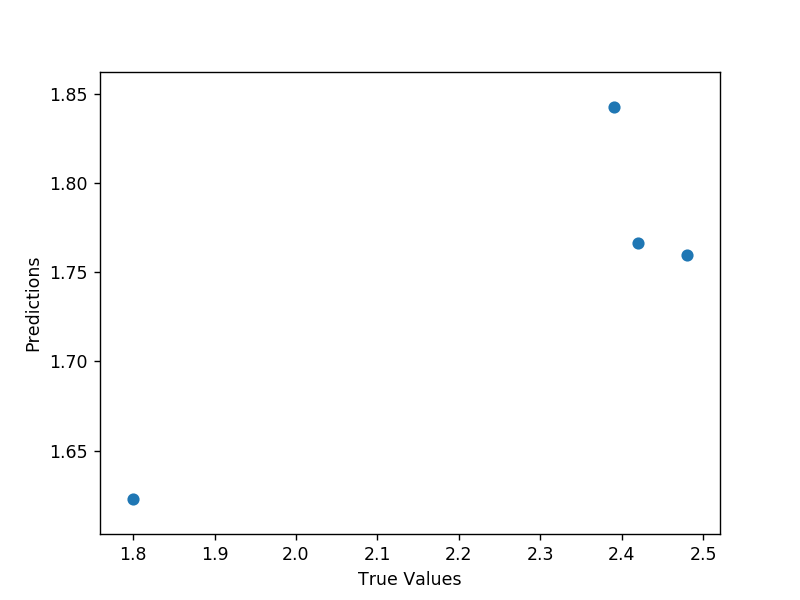

Text(0, 0.5, 'Predictions')

In [48]:
from matplotlib import pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [49]:
print ('Score: ', model.score(X_test, y_test))

Score:  -3.2319491008729786


In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [92]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=4094, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [95]:
opt = Adam(lr=2e-3, decay=1e-3 / 200)
#model.compile(loss="mean_squared_error", optimizer=opt)


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = "opt", loss = root_mean_squared_error, 
              metrics =["accuracy"])

# train the model
print("[INFO] training model...")
model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=800)

ValueError: Unknown optimizer: opt

In [96]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape#, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.noise import GaussianNoise

In [97]:
#Hyperparameters for the network
DENSE = 128
DROPOUT = 0.5
C1_K  = 8 #Number of kernels/feature extractors for first layer
C1_S  = 32 #Width of the convolutional mini networks
C2_K  = 16
C2_S  = 32

activation='relu'

input_dim = X_train.shape[1]

#The model
def make_model():
    model = Sequential()
    #Adding a bit of GaussianNoise also works as regularization
    model.add(GaussianNoise(0.05, input_shape=(input_dim,)))
    #First two is number of filter + kernel size
    model.add(Reshape((input_dim, 1)))
    model.add(Conv1D(C1_K, (C1_S), activation=activation, border_mode="same"))
    model.add(Conv1D(C2_K, (C2_S), border_mode="same", activation=activation))
    model.add(Flatten())
    model.add(Dropout(DROPOUT))
    model.add(Dense(DENSE, activation=activation))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.01))#, metrics=['mean_absolute_error'])

    return model

In [98]:
model = make_model()
print(model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_1 (GaussianNo (None, 4094)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4094, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4094, 8)           264       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4094, 16)          4112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 65504)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 65504)             0         
__________________________

C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(8, 32, activation="relu", padding="same")`
C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 32, activation="relu", padding="same")`


In [101]:

rdlr = ReduceLROnPlateau(patience=25, factor=0.5, min_lr=1e-6, monitor='val_loss', verbose=1)

h = model.fit(X_train, y_train, epochs=600, batch_size=8, validation_data=(X_test, y_test), callbacks=[rdlr])

Train on 16 samples, validate on 4 samples
Epoch 1/600
16/16 [==============================] - 3s 180ms/step - loss: 5.5819 - val_loss: 4.0363
Epoch 2/600
16/16 [==============================] - 0s 23ms/step - loss: 5.3376 - val_loss: 3.9618
Epoch 3/600
16/16 [==============================] - 0s 23ms/step - loss: 5.0505 - val_loss: 3.8761
Epoch 4/600
16/16 [==============================] - 0s 23ms/step - loss: 4.7759 - val_loss: 3.7788
Epoch 5/600
16/16 [==============================] - 0s 23ms/step - loss: 4.4056 - val_loss: 3.6649
Epoch 6/600
16/16 [==============================] - 0s 22ms/step - loss: 4.0462 - val_loss: 3.5372
Epoch 7/600
16/16 [==============================] - 0s 23ms/step - loss: 3.6545 - val_loss: 3.3966
Epoch 8/600
16/16 [==============================] - 0s 22ms/step - loss: 3.2958 - val_loss: 3.2419
Epoch 9/600
16/16 [==============================] - 0s 22ms/step - loss: 2.9379 - val_loss: 3.0723
Epoch 10/600
16/16 [==============================] - 0s

Epoch 82/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4523 - val_loss: 0.9813
Epoch 83/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4598 - val_loss: 0.9821
Epoch 84/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4720 - val_loss: 0.9791
Epoch 85/600
16/16 [==============================] - 0s 28ms/step - loss: 0.4473 - val_loss: 0.9772
Epoch 86/600
16/16 [==============================] - 0s 26ms/step - loss: 0.4649 - val_loss: 0.9698
Epoch 87/600
16/16 [==============================] - 0s 26ms/step - loss: 0.4502 - val_loss: 0.9722
Epoch 88/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4831 - val_loss: 0.9763
Epoch 89/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4576 - val_loss: 0.9718
Epoch 90/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4678 - val_loss: 0.9742
Epoch 91/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4640 - val_los

16/16 [==============================] - 0s 23ms/step - loss: 0.4448 - val_loss: 0.9491
Epoch 242/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4546 - val_loss: 0.9480
Epoch 243/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4600 - val_loss: 0.9459
Epoch 244/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4557 - val_loss: 0.9463
Epoch 245/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4959 - val_loss: 0.9488
Epoch 246/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4475 - val_loss: 0.9435
Epoch 247/600
16/16 [==============================] - 0s 24ms/step - loss: 0.4546 - val_loss: 0.9473
Epoch 248/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4616 - val_loss: 0.9456
Epoch 249/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4637 - val_loss: 0.9431
Epoch 250/600
16/16 [==============================] - 0s 24ms/step - loss: 0.4661 - val_loss: 0

16/16 [==============================] - 0s 23ms/step - loss: 0.4868 - val_loss: 0.9404
Epoch 320/600
16/16 [==============================] - 0s 27ms/step - loss: 0.4524 - val_loss: 0.9408
Epoch 321/600
16/16 [==============================] - 0s 27ms/step - loss: 0.4520 - val_loss: 0.9410
Epoch 322/600
16/16 [==============================] - 0s 27ms/step - loss: 0.4674 - val_loss: 0.9408
Epoch 323/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4434 - val_loss: 0.9406
Epoch 324/600
16/16 [==============================] - 0s 29ms/step - loss: 0.4738 - val_loss: 0.9407
Epoch 325/600
16/16 [==============================] - 0s 24ms/step - loss: 0.4665 - val_loss: 0.9407
Epoch 326/600
16/16 [==============================] - 0s 27ms/step - loss: 0.4650 - val_loss: 0.9403
Epoch 327/600
16/16 [==============================] - 0s 26ms/step - loss: 0.4521 - val_loss: 0.9398
Epoch 328/600
16/16 [==============================] - 0s 27ms/step - loss: 0.4179 - val_loss: 0

Epoch 398/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4581 - val_loss: 0.9410
Epoch 399/600
16/16 [==============================] - 0s 22ms/step - loss: 0.4360 - val_loss: 0.9409
Epoch 400/600
16/16 [==============================] - 0s 28ms/step - loss: 0.4621 - val_loss: 0.9410
Epoch 401/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4345 - val_loss: 0.9409
Epoch 402/600
16/16 [==============================] - 0s 22ms/step - loss: 0.4448 - val_loss: 0.9410

Epoch 00402: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 403/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4702 - val_loss: 0.9410
Epoch 404/600
16/16 [==============================] - 0s 22ms/step - loss: 0.4733 - val_loss: 0.9409
Epoch 405/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4724 - val_loss: 0.9410
Epoch 406/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4365 - val_loss: 0.9410
E

Epoch 476/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4652 - val_loss: 0.9407
Epoch 477/600
16/16 [==============================] - 0s 24ms/step - loss: 0.4611 - val_loss: 0.9407

Epoch 00477: ReduceLROnPlateau reducing learning rate to 9.765624781721272e-06.
Epoch 478/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4426 - val_loss: 0.9407
Epoch 479/600
16/16 [==============================] - 0s 24ms/step - loss: 0.4464 - val_loss: 0.9407
Epoch 480/600
16/16 [==============================] - 0s 26ms/step - loss: 0.4428 - val_loss: 0.9407
Epoch 481/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4639 - val_loss: 0.9407
Epoch 482/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4496 - val_loss: 0.9407
Epoch 483/600
16/16 [==============================] - 0s 23ms/step - loss: 0.4644 - val_loss: 0.9407
Epoch 484/600
16/16 [==============================] - 0s 25ms/step - loss: 0.4460 - val_loss: 0.9407
E

In [71]:
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [77]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [78]:
y_train

,0
11,2.49
7,2.27
9,2.62
16,2.39
6,1.31
1,1.8
15,2.4
12,2.53
14,2.54
13,2.48
